# Import modules

In [1]:
import pandas as pd

# our modules
import sys
sys.path.insert(0, '..')

# user defined
from clean import clean_data
from imbalance import balance_data
from evaluate import evaluate_model
from utilities import save_model

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Classifiers
# from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

# pipeline
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

2023-07-03 18:47:34.455823: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 18:47:34.478840: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 18:47:34.593836: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 18:47:34.595286: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 18:47:35.150898: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
pd.set_option("display.precision", 6)
pd.set_option("display.float_format", lambda x: "%.6f" % x)

In [3]:
RANDOM_STATE = 123

# Load data

In [4]:
data = pd.read_csv('/home/hristo/Documents/WBS_Data_Science/WBS_Predictive_Maintenance/data/ai4i2020.csv', index_col='UDI')

In [5]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.100000,308.600000,1551,42.800000,0,0,0,0,0,0,0
2,L47181,L,298.200000,308.700000,1408,46.300000,3,0,0,0,0,0,0
3,L47182,L,298.100000,308.500000,1498,49.400000,5,0,0,0,0,0,0
4,L47183,L,298.200000,308.600000,1433,39.500000,7,0,0,0,0,0,0
5,L47184,L,298.200000,308.700000,1408,40.000000,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.800000,308.400000,1604,29.500000,14,0,0,0,0,0,0
9997,H39410,H,298.900000,308.400000,1632,31.800000,17,0,0,0,0,0,0
9998,M24857,M,299.000000,308.600000,1645,33.400000,22,0,0,0,0,0,0


# Clean data

In [6]:
data_cl = clean_data(data, drop_type=True)
data_cl

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
UDI,,,,,,
1,298.100000,308.600000,1551,42.800000,0,0
2,298.200000,308.700000,1408,46.300000,3,0
3,298.100000,308.500000,1498,49.400000,5,0
4,298.200000,308.600000,1433,39.500000,7,0
5,298.200000,308.700000,1408,40.000000,9,0
...,...,...,...,...,...,...
9996,298.800000,308.400000,1604,29.500000,14,0
9997,298.900000,308.400000,1632,31.800000,17,0
9998,299.000000,308.600000,1645,33.400000,22,0


# Prepare data

In [7]:
X = data_cl.copy()
y = X.pop('Machine failure')

In [8]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
UDI,,,,,
1,298.100000,308.600000,1551,42.800000,0
2,298.200000,308.700000,1408,46.300000,3
3,298.100000,308.500000,1498,49.400000,5
4,298.200000,308.600000,1433,39.500000,7
5,298.200000,308.700000,1408,40.000000,9
...,...,...,...,...,...
9996,298.800000,308.400000,1604,29.500000,14
9997,298.900000,308.400000,1632,31.800000,17
9998,299.000000,308.600000,1645,33.400000,22


## Scale data

In [9]:
def scale_data(data):
    data = data.copy()
    return StandardScaler().fit_transform(data)

In [10]:
X_sc = scale_data(X)

In [11]:
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [12]:
X_sc

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
UDI,,,,,
1,-0.952389,-0.947360,0.068185,0.282200,-1.695984
2,-0.902393,-0.879959,-0.729472,0.633308,-1.648852
3,-0.952389,-1.014761,-0.227450,0.944290,-1.617430
4,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009
5,-0.902393,-0.879959,-0.729472,0.001313,-1.554588
...,...,...,...,...,...
9996,-0.602417,-1.082162,0.363820,-1.052012,-1.476034
9997,-0.552421,-1.082162,0.520005,-0.821283,-1.428902
9998,-0.502425,-0.947360,0.592519,-0.660777,-1.350349


# Split train and test

In [37]:
balance = True
if balance:
    data_bal, method = balance_data(X_sc, y, RANDOM_STATE, 'ROS')
    X_bl, y_bl = data_bal
    # y_bl.value_counts().plot(kind='bar')

    X_train, X_test, y_train, y_test = train_test_split(X_bl, y_bl, train_size=0.8, random_state=RANDOM_STATE)
else:
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, train_size=0.8, random_state=RANDOM_STATE)

In [38]:
y_imb = y.value_counts()
y_imb

0    9661
1     339
Name: Machine failure, dtype: int64

[Text(0, 0, '9661'), Text(0, 0, '339')]

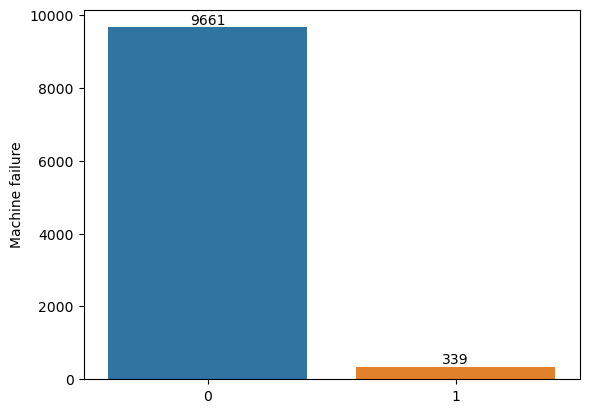

In [39]:
ax = sns.barplot(
    y=y_imb,
    x=y_imb.index
)

ax.bar_label(ax.containers[0])

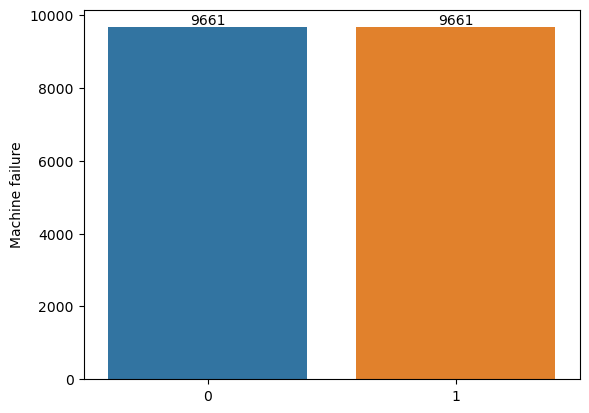

In [40]:
if balance:
    y_b = y_bl.value_counts()
    ax = sns.barplot(
        y=y_b,
        x=y_b.index
    )

    ax.bar_label(ax.containers[0])

# Baseline model

In [41]:
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=40,
    monitor='loss',
    restore_best_weights=True,
)

In [42]:
def baseline_model(input_shape, n_nodes=512, n_hidden=2):
    ''' create model '''

    model = Sequential()
    model.add(Dense(n_nodes, activation='relu', input_shape=[input_shape]))
    for i in range(n_hidden):
        model.add(Dropout(0.3))
        model.add(BatchNormalization())
        model.add(Dense(n_nodes, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    return model

In [43]:
classifier = KerasClassifier(
    model=baseline_model(input_shape=X_train.shape[1], n_hidden=3),
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
    epochs=100,
    callbacks=early_stopping,
    random_state=RANDOM_STATE,
    verbose=False
)

In [44]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', classifier)
])

In [45]:
pipeline.fit(X_train, y_train)

2023-07-03 18:58:26.482575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [15457,5]
	 [[{{node Placeholder/_10}}]]
2023-07-03 18:58:26.482753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [15457,1]
	 [[{{node Placeholder/_11}}]]


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 KerasClassifier(callbacks=<keras.callbacks.EarlyStopping object at 0x7f87e8d1ea10>, epochs=100, loss='binary_crossentropy', metrics=['binary_accuracy'], model=<keras.engine.sequential.Sequential object at 0x7f87e8d70d50>, optimizer='adam', random_state=123, verbose=False))])

In [46]:
y_pred = pipeline.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy - {100*accuracy:.2f} %')

accuracy - 98.01 %


# Grid

In [48]:
optimizers = ['rmsprop', 'adam']
# init = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
# batches = [5, 10, 20]
param_grid = dict(
    classifier__optimizer=optimizers,
    classifier__epochs=epochs,
    # classifier__init=init
)

In [49]:
def run_model(pipe, params, X_train, y_train, X_test):
    ''' compute deep learning model(s)'''

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        scoring='accuracy',
        verbose=1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_params = grid.best_params_

    return best_model, best_params

In [50]:
best_model, best_params = run_model(pipeline, param_grid, X_train, y_train, X_test)

2023-07-03 19:02:31.853136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:02:31.859809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:02:31.866289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:02

INFO:tensorflow:Assets written to: ram://aa3c1e40cc6a4e9f9e4c831b06c09830/assets


INFO:tensorflow:Assets written to: ram://aa3c1e40cc6a4e9f9e4c831b06c09830/assets
2023-07-03 19:02:32.861506: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d13af6533026425a8cbc4f710d1faea1: INVALID_ARGUMENT: ram://d13af6533026425a8cbc4f710d1faea1 is a directory.
2023-07-03 19:02:33.295751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:02:33.302631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:02:33.309302: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://e9757ae7111341dd941d59ac7b662054/assets


INFO:tensorflow:Assets written to: ram://e9757ae7111341dd941d59ac7b662054/assets
2023-07-03 19:02:34.247986: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://a0c852ade680476780e4813ec95ed2c8: INVALID_ARGUMENT: ram://a0c852ade680476780e4813ec95ed2c8 is a directory.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


2023-07-03 19:02:34.537494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:02:34.544570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:02:34.551526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:02

INFO:tensorflow:Assets written to: ram://7b0ac048bff749e18323854fdf265213/assets


INFO:tensorflow:Assets written to: ram://7b0ac048bff749e18323854fdf265213/assets
2023-07-03 19:02:35.501617: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d2ac32f1d88a453e8c9c0932af392bb7: INVALID_ARGUMENT: ram://d2ac32f1d88a453e8c9c0932af392bb7 is a directory.
2023-07-03 19:02:35.967782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:02:35.975680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:02:35.982721: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://80d50cf199c44f8f85c270920956dee5/assets


INFO:tensorflow:Assets written to: ram://80d50cf199c44f8f85c270920956dee5/assets
2023-07-03 19:02:36.972042: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://53e66798fffe4b61b88574a3691a73c7: INVALID_ARGUMENT: ram://53e66798fffe4b61b88574a3691a73c7 is a directory.
2023-07-03 19:02:37.043512: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:02:37.043656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:04:

INFO:tensorflow:Assets written to: ram://edd156625dac4121a0b44ff6c9e3bd4a/assets


INFO:tensorflow:Assets written to: ram://edd156625dac4121a0b44ff6c9e3bd4a/assets
2023-07-03 19:04:09.749556: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://6281d6c48efc4dbbb4b06767904fe4ff: INVALID_ARGUMENT: ram://6281d6c48efc4dbbb4b06767904fe4ff is a directory.
2023-07-03 19:04:10.044733: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:04:10.052999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:04:10.060216: I tensorflow/core/common_runt

2023-07-03 19:04:10.523792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:04:10.565615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:04:10.606515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ram://bf22c7cc6d2f40daa4c091f3b44e007b/assets


INFO:tensorflow:Assets written to: ram://bf22c7cc6d2f40daa4c091f3b44e007b/assets
2023-07-03 19:04:11.312627: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://7794e5a7fc044d919821d1dc366322ef: INVALID_ARGUMENT: ram://7794e5a7fc044d919821d1dc366322ef is a directory.
2023-07-03 19:04:11.385549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:04:11.385694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:05:

INFO:tensorflow:Assets written to: ram://5fa21ea6ba2d494492486a979872ab11/assets


INFO:tensorflow:Assets written to: ram://5fa21ea6ba2d494492486a979872ab11/assets
2023-07-03 19:05:42.793248: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://381cdc7ce13f415f91d0e71c62ef8f95: INVALID_ARGUMENT: ram://381cdc7ce13f415f91d0e71c62ef8f95 is a directory.
2023-07-03 19:05:43.081441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:05:43.088820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:05:43.095671: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://9fe1cab277474c5a865ace5d0123dba0/assets


INFO:tensorflow:Assets written to: ram://9fe1cab277474c5a865ace5d0123dba0/assets
2023-07-03 19:05:44.323031: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://669df5d437ec400eb489ee1a1c66e807: INVALID_ARGUMENT: ram://669df5d437ec400eb489ee1a1c66e807 is a directory.
2023-07-03 19:05:44.395451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:05:44.395608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:07:

INFO:tensorflow:Assets written to: ram://eba324fd07344bdbb774e85a2a077638/assets


INFO:tensorflow:Assets written to: ram://eba324fd07344bdbb774e85a2a077638/assets
2023-07-03 19:07:25.382323: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8f6bba795e3e43fba88b8ee0738e1abd: INVALID_ARGUMENT: ram://8f6bba795e3e43fba88b8ee0738e1abd is a directory.
2023-07-03 19:07:25.670504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:07:25.677888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:07:25.684747: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://b55165bd836b464d859f7ebf37037c96/assets


INFO:tensorflow:Assets written to: ram://b55165bd836b464d859f7ebf37037c96/assets
2023-07-03 19:07:26.672250: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://89d3fe4bc92b4a00a1edc18bcbb4b6cd: INVALID_ARGUMENT: ram://89d3fe4bc92b4a00a1edc18bcbb4b6cd is a directory.
2023-07-03 19:07:26.741743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:07:26.741883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]


2023-07-03 19:09:08.024009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:09:08.032361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:09:08.039591: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:09

INFO:tensorflow:Assets written to: ram://bc6823fa3827493dbe6989a53f228a95/assets


INFO:tensorflow:Assets written to: ram://bc6823fa3827493dbe6989a53f228a95/assets
2023-07-03 19:09:09.059457: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f1048010f5c7482785948b6b777303cb: INVALID_ARGUMENT: ram://f1048010f5c7482785948b6b777303cb is a directory.
2023-07-03 19:09:09.361408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:09:09.369821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:09:09.377161: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://80cb6b078f56459c9188e767d61de0ac/assets


INFO:tensorflow:Assets written to: ram://80cb6b078f56459c9188e767d61de0ac/assets
2023-07-03 19:09:10.361157: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://20794d15391f4597805492cfdcae773d: INVALID_ARGUMENT: ram://20794d15391f4597805492cfdcae773d is a directory.
2023-07-03 19:09:10.432402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:09:10.432546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]


2023-07-03 19:10:49.183169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:10:49.198945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:10:49.207436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:10

INFO:tensorflow:Assets written to: ram://6fb15bf5659d4ef0bc8c871b0110e021/assets


INFO:tensorflow:Assets written to: ram://6fb15bf5659d4ef0bc8c871b0110e021/assets
2023-07-03 19:10:50.242907: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://fb03c9540bf842b9a378bb86b39fb99f: INVALID_ARGUMENT: ram://fb03c9540bf842b9a378bb86b39fb99f is a directory.
2023-07-03 19:10:50.540754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:10:50.548037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:10:50.555061: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://519bb742cee64d1cb9fb631be6584da1/assets


INFO:tensorflow:Assets written to: ram://519bb742cee64d1cb9fb631be6584da1/assets
2023-07-03 19:10:51.538724: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1d2ad19bac2c49cd97d58465c51193fd: INVALID_ARGUMENT: ram://1d2ad19bac2c49cd97d58465c51193fd is a directory.
2023-07-03 19:10:51.609905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12365,5]
	 [[{{node Placeholder/_10}}]]
2023-07-03 19:10:51.610048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:12:

2023-07-03 19:12:31.276953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:12:31.316355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:12:31.354753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ram://553f975089e74ddfa057cadfe89d498c/assets


INFO:tensorflow:Assets written to: ram://553f975089e74ddfa057cadfe89d498c/assets
2023-07-03 19:12:32.065135: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://95496793555a4e3887dd5bb15510a3da: INVALID_ARGUMENT: ram://95496793555a4e3887dd5bb15510a3da is a directory.
2023-07-03 19:12:32.357139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:12:32.364420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:12:32.371465: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://3e20ad2c9a68455d9661ae05b2619938/assets


INFO:tensorflow:Assets written to: ram://3e20ad2c9a68455d9661ae05b2619938/assets
2023-07-03 19:12:33.336167: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://b8d7c3ee312f444bbee88f9e99fd94d3: INVALID_ARGUMENT: ram://b8d7c3ee312f444bbee88f9e99fd94d3 is a directory.
2023-07-03 19:12:33.407155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12365,5]
	 [[{{node Placeholder/_10}}]]
2023-07-03 19:12:33.407305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:14:

INFO:tensorflow:Assets written to: ram://847b659c9049473ebacdf1a463e60911/assets


INFO:tensorflow:Assets written to: ram://847b659c9049473ebacdf1a463e60911/assets


2023-07-03 19:14:12.246247: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://0098ccc05bfc470fb6ad86a5ccfe88c9: INVALID_ARGUMENT: ram://0098ccc05bfc470fb6ad86a5ccfe88c9 is a directory.
2023-07-03 19:14:12.602074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:14:12.612474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:14:12.621647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this 

INFO:tensorflow:Assets written to: ram://6ee9e35d902349b7816a75919269489a/assets


INFO:tensorflow:Assets written to: ram://6ee9e35d902349b7816a75919269489a/assets
2023-07-03 19:14:13.703650: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://409166152cb24531925f5996c8e07a32: INVALID_ARGUMENT: ram://409166152cb24531925f5996c8e07a32 is a directory.
2023-07-03 19:14:13.773767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:14:13.773931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:15:

INFO:tensorflow:Assets written to: ram://ba1c51e069ec409dac01f2e7c12d4ac4/assets


INFO:tensorflow:Assets written to: ram://ba1c51e069ec409dac01f2e7c12d4ac4/assets


2023-07-03 19:15:50.045851: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://bdb42a84cd924eccb323498ed8ff4f2d: INVALID_ARGUMENT: ram://bdb42a84cd924eccb323498ed8ff4f2d is a directory.
2023-07-03 19:15:50.384657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:15:50.395839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:15:50.403523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this 

INFO:tensorflow:Assets written to: ram://078f71644a9546b79237104ef67c8826/assets


INFO:tensorflow:Assets written to: ram://078f71644a9546b79237104ef67c8826/assets
2023-07-03 19:15:51.503028: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3d1f4c9f9c2e434c914d6de2840119be: INVALID_ARGUMENT: ram://3d1f4c9f9c2e434c914d6de2840119be is a directory.
2023-07-03 19:15:51.587864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:15:51.588044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:17:

INFO:tensorflow:Assets written to: ram://093261540cac4e82bb323a09f6fafbc0/assets


INFO:tensorflow:Assets written to: ram://093261540cac4e82bb323a09f6fafbc0/assets
2023-07-03 19:17:26.892377: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://9f2490488c5c4b8f8b34fbb59db65e53: INVALID_ARGUMENT: ram://9f2490488c5c4b8f8b34fbb59db65e53 is a directory.


2023-07-03 19:17:27.486681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:17:27.494570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:17:27.501770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:17

INFO:tensorflow:Assets written to: ram://d4e99476a72c4d5fb25f4006123b10d2/assets


INFO:tensorflow:Assets written to: ram://d4e99476a72c4d5fb25f4006123b10d2/assets
2023-07-03 19:17:28.500451: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://afad6826477a4eff900ed181e4e74722: INVALID_ARGUMENT: ram://afad6826477a4eff900ed181e4e74722 is a directory.
2023-07-03 19:17:28.578051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:17:28.578224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:19:

INFO:tensorflow:Assets written to: ram://f41270e190bf467aa3aee96c04e53c79/assets


INFO:tensorflow:Assets written to: ram://f41270e190bf467aa3aee96c04e53c79/assets
2023-07-03 19:19:09.208517: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://514f9ba5207c4c79bfd883994de3a949: INVALID_ARGUMENT: ram://514f9ba5207c4c79bfd883994de3a949 is a directory.
2023-07-03 19:19:09.508252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:19:09.516070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:19:09.523175: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://d0e117f5571241a986a14d853044bddc/assets


INFO:tensorflow:Assets written to: ram://d0e117f5571241a986a14d853044bddc/assets
2023-07-03 19:19:10.805706: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c2a640a44179413880148a9ae5aed4a5: INVALID_ARGUMENT: ram://c2a640a44179413880148a9ae5aed4a5 is a directory.
2023-07-03 19:19:10.879795: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:19:10.879985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:21:

INFO:tensorflow:Assets written to: ram://d21f6382c8524ae68015f974234b150b/assets


INFO:tensorflow:Assets written to: ram://d21f6382c8524ae68015f974234b150b/assets
2023-07-03 19:21:11.358243: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://29dce330f8d24b138e33847dcb123a9d: INVALID_ARGUMENT: ram://29dce330f8d24b138e33847dcb123a9d is a directory.
2023-07-03 19:21:11.667644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:21:11.675195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:21:11.682553: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://da9dc58affff43f08bc6eb1254d29d1d/assets


INFO:tensorflow:Assets written to: ram://da9dc58affff43f08bc6eb1254d29d1d/assets
2023-07-03 19:21:12.683262: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://a0e8993f726d47b98ad7fc764c6a8629: INVALID_ARGUMENT: ram://a0e8993f726d47b98ad7fc764c6a8629 is a directory.
2023-07-03 19:21:12.755430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:21:12.755580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]


2023-07-03 19:24:25.706069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:24:25.713650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:24:25.721079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:24

INFO:tensorflow:Assets written to: ram://089246bfc07b4fbf90f982137f322dad/assets


INFO:tensorflow:Assets written to: ram://089246bfc07b4fbf90f982137f322dad/assets
2023-07-03 19:24:26.750026: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://df1e5ace09cd4a2c9c6dabbb683c2247: INVALID_ARGUMENT: ram://df1e5ace09cd4a2c9c6dabbb683c2247 is a directory.
2023-07-03 19:24:27.056015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:24:27.063723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:24:27.070897: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://9efaafb98a374416bbbb89612f9da5ff/assets


INFO:tensorflow:Assets written to: ram://9efaafb98a374416bbbb89612f9da5ff/assets
2023-07-03 19:24:28.072741: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4ce85f77ba8c4c84b8bddcb68fc85d21: INVALID_ARGUMENT: ram://4ce85f77ba8c4c84b8bddcb68fc85d21 is a directory.
2023-07-03 19:24:28.148918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:24:28.149106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]


2023-07-03 19:27:51.647549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


2023-07-03 19:27:51.942589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:27:51.952022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:27:51.959267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:27

INFO:tensorflow:Assets written to: ram://c63175fb6b29424ea11d9f8ae90303d1/assets


INFO:tensorflow:Assets written to: ram://c63175fb6b29424ea11d9f8ae90303d1/assets
2023-07-03 19:27:52.991142: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://bdc0e13415254b1d8f49c12d2383e8dc: INVALID_ARGUMENT: ram://bdc0e13415254b1d8f49c12d2383e8dc is a directory.
2023-07-03 19:27:53.292643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:27:53.300428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:27:53.307637: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://8b812bd7b68249598f6eed8de1f7b531/assets


INFO:tensorflow:Assets written to: ram://8b812bd7b68249598f6eed8de1f7b531/assets
2023-07-03 19:27:54.351375: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://ee7ad1d80b2a40558bad674b2d3a1e6f: INVALID_ARGUMENT: ram://ee7ad1d80b2a40558bad674b2d3a1e6f is a directory.
2023-07-03 19:27:54.425650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:27:54.425794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:30:

INFO:tensorflow:Assets written to: ram://bb9086ba04674098a1a163d09b1c7380/assets


INFO:tensorflow:Assets written to: ram://bb9086ba04674098a1a163d09b1c7380/assets
2023-07-03 19:30:26.419239: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://558f60963a364fceb6163da40361a697: INVALID_ARGUMENT: ram://558f60963a364fceb6163da40361a697 is a directory.
2023-07-03 19:30:26.725389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:30:26.732829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:30:26.740106: I tensorflow/core/common_runt

INFO:tensorflow:Assets written to: ram://40a0c91366de43eb8d02fbbb317adcfa/assets


INFO:tensorflow:Assets written to: ram://40a0c91366de43eb8d02fbbb317adcfa/assets
2023-07-03 19:30:27.765444: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1e216174894340968648735b7f039c7d: INVALID_ARGUMENT: ram://1e216174894340968648735b7f039c7d is a directory.
2023-07-03 19:30:27.840964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12366,5]
	 [[{{node Placeholder/_10}}]]
2023-07-03 19:30:27.841124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12366,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:33:

INFO:tensorflow:Assets written to: ram://ece311abc75144cc9f47d90233e1becb/assets


INFO:tensorflow:Assets written to: ram://ece311abc75144cc9f47d90233e1becb/assets


2023-07-03 19:33:08.998409: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1c208cbde01b415489ff0505462b278a: INVALID_ARGUMENT: ram://1c208cbde01b415489ff0505462b278a is a directory.
2023-07-03 19:33:09.306789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:33:09.314143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-03 19:33:09.321452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this 

INFO:tensorflow:Assets written to: ram://9d1e002d12fd4d81853e2824acd688fe/assets


INFO:tensorflow:Assets written to: ram://9d1e002d12fd4d81853e2824acd688fe/assets
2023-07-03 19:33:10.344715: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://a9b411785bdb4a0585d24a22063cae7a: INVALID_ARGUMENT: ram://a9b411785bdb4a0585d24a22063cae7a is a directory.
2023-07-03 19:33:10.419655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12365,5]
	 [[{{node Placeholder/_10}}]]
2023-07-03 19:33:10.419816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [12365,1]
	 [[{{node Placeholder/_11}}]]

KeyboardInterrup

In [51]:
predictions = best_model.predict(X_test)
predictions = pd.DataFrame(predictions.round(), index=y_test.index)

NameError: name 'best_model' is not defined

In [52]:
accuracy = accuracy_score(y_test, predictions)
print(100*accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [3865, 2000]

# Model history

In [53]:
def create_model(n_nodes, n_hidden, input_shape, optimizer, n_epochs, loss='binary_crossentropy', metrics=['binary_accuracy']):

    model = Sequential()
    model.add(Dense(n_nodes, activation='relu', input_shape=[input_shape]))
    for i in range(n_hidden):
        model.add(Dense(n_nodes, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=int(n_nodes/2),
        epochs=n_epochs,
        callbacks=[early_stopping],
        verbose=0
    )

    predictions = model.predict(X_test)
    predictions = pd.DataFrame(predictions.round(), index=y_test.index)

    return history, model, predictions

In [54]:
history, model, predictions = create_model(128, 2, X_train.shape[1], 'adam', 150)

2023-07-03 19:34:24.187609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [15457,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:34:24.187784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [15457,1]
	 [[{{node Placeholder/_11}}]]
2023-07-03 19:34:24.863360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype double and sh

121/121 [==============================] - 0s 627us/step


2023-07-03 19:35:19.616050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype double and shape [3865,5]
	 [[{{node Placeholder/_10}}]]
2023-07-03 19:35:19.616207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype double and shape [3865,5]
	 [[{{node Placeholder/_10}}]]


In [55]:
history_df = pd.DataFrame(history.history)

Minimum validation loss: 2.406118%
Maximum validation accuracy: 99.482536%
Maximum binary accuracy: 99.902958%


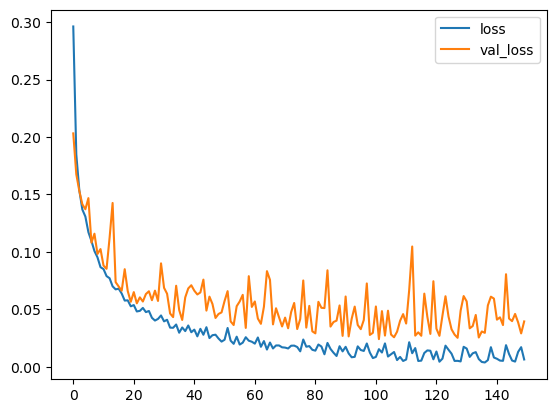

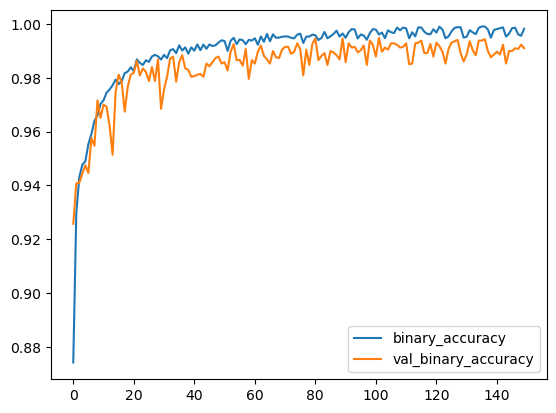

In [56]:
# history_df.loc[:, ['loss', 'val_loss']].plot()
# plt.ylim([0, 1])
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
print(f"Minimum validation loss: {history_df['val_loss'].min():.6%}")
print(f"Maximum validation accuracy: {history_df['val_binary_accuracy'].max():.6%}")
print(f"Maximum binary accuracy: {history_df['binary_accuracy'].max():.6%}")

In [57]:
y_pred = predictions

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy - {100*accuracy:.2f} %')

accuracy - 99.09 %


# save model

In [62]:
save_model(model, '../../models/DL_balanced_single.joblib')

INFO:tensorflow:Assets written to: ram://4d69507c79f8482195b8490c764dcf8d/assets


INFO:tensorflow:Assets written to: ram://4d69507c79f8482195b8490c764dcf8d/assets
